In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_excel("Master_Data.xlsx")

In [3]:
df.head()

,Irradiance_A,Irradiance,Temperature_A,Temperature,Power
0,25.0,25,700.0,700,27.8
1,27.0,27,700.0,700,26.5
2,29.0,29,700.0,700,25.8
3,31.0,31,700.0,700,25.4
4,33.0,33,700.0,700,25.2


In [4]:
del df["Irradiance_A"]


In [5]:
del df["Temperature_A"]

In [6]:
df.head(10)

,Irradiance,Temperature,Power
0,25,700,27.80
1,27,700,26.50
2,29,700,25.80
3,31,700,25.40
4,33,700,25.20
5,35,700,24.90
6,37,700,24.40
7,39,700,24.12
8,41,700,24.00
9,25,800,31.80


In [7]:
df.describe()

,Irradiance,Temperature,Power
count,676.000000,676.000000,676.000000
mean,33.667160,708.392012,21.857411
std,2.078501,160.992519,4.255331
min,25.000000,417.000000,14.020000
25%,32.000000,571.000000,21.187500
50%,33.000000,571.000000,21.680000
75%,35.000000,856.000000,21.950000
max,43.000000,1200.000000,45.700000


In [8]:
df.rename(columns={'Irradiance': 'Temperature', 'Temperature': 'Irradiance'}, inplace=True)

In [9]:
df.head(10)

,Temperature,Irradiance,Power
0,25,700,27.80
1,27,700,26.50
2,29,700,25.80
3,31,700,25.40
4,33,700,25.20
5,35,700,24.90
6,37,700,24.40
7,39,700,24.12
8,41,700,24.00
9,25,800,31.80


In [10]:
df.count()

Temperature    676
Irradiance     676
Power          676
dtype: int64

In [11]:
df.describe()

,Temperature,Irradiance,Power
count,676.000000,676.000000,676.000000
mean,33.667160,708.392012,21.857411
std,2.078501,160.992519,4.255331
min,25.000000,417.000000,14.020000
25%,32.000000,571.000000,21.187500
50%,33.000000,571.000000,21.680000
75%,35.000000,856.000000,21.950000
max,43.000000,1200.000000,45.700000


In [12]:
df.corr()

,Temperature,Irradiance,Power
Temperature,1.000000,0.268699,-0.213354
Irradiance,0.268699,1.000000,0.309258
Power,-0.213354,0.309258,1.000000


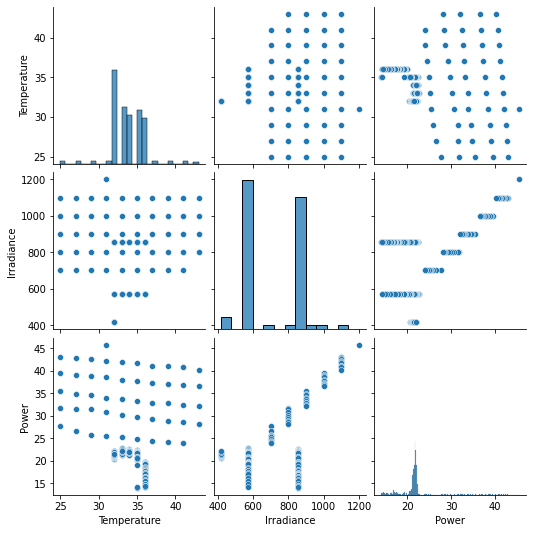

In [13]:
import seaborn as sns
sns.pairplot(df)

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Irradiance'],df['Power'])

NameError: name 'df' is not defined

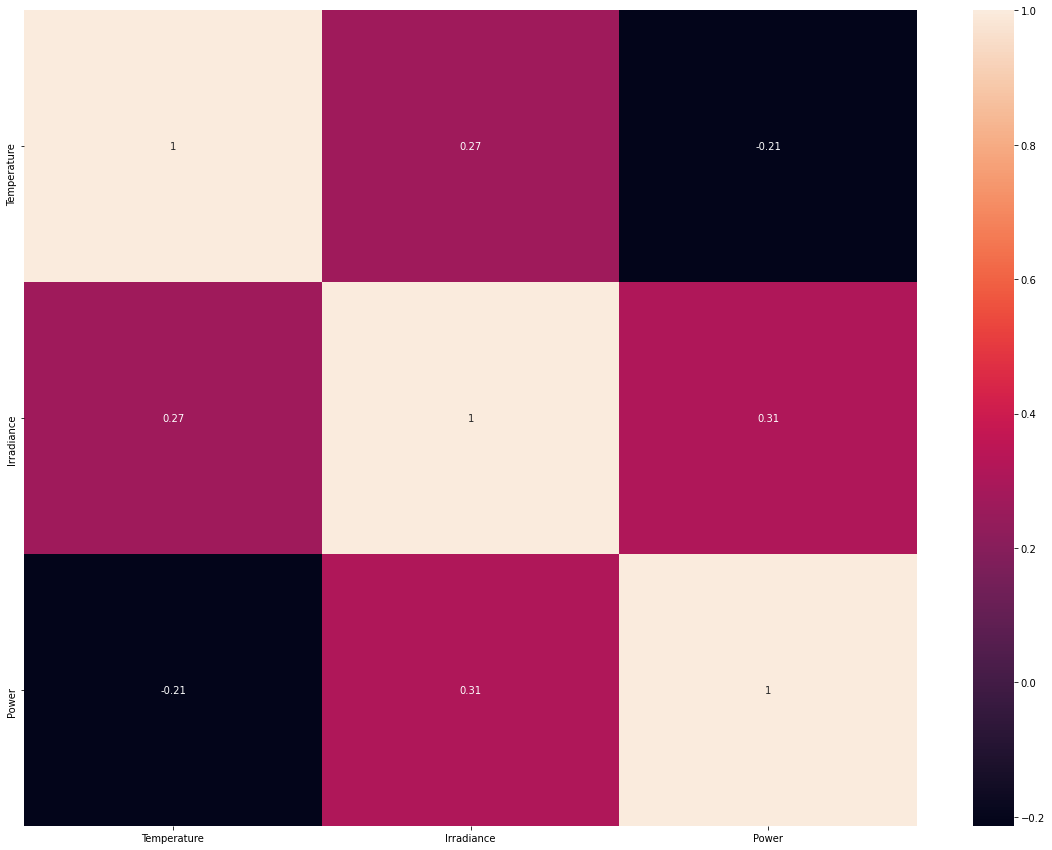

In [14]:
import matplotlib.pyplot as plt
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,15))
#HEATMAP
df_heatmap = sns.heatmap(df[top_corr_features].corr(),annot = True)

In [15]:
X = df[['Irradiance','Temperature']]
Y = df[['Power']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=2529)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((473, 2), (203, 2), (473, 1), (203, 1))

##### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [20]:
y_pred = lr.predict(X_test)

In [21]:
r2_score(Y_test,y_pred)

0.021057917029440376

In [22]:
mean_absolute_error(Y_test,y_pred)

2.6306238151242414

In [23]:
mean_squared_error(Y_test,y_pred)

18.694087535525018

##### Decision Tree Regressor

In [24]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, Y_train)
# Predict
result = regr.predict(X_test)
print(result)

[21.71604113 21.71604113 36.70285714 21.71604113 21.71604113 21.71604113
 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 17.41727273 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 17.41727273 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 17.41727273 21.71604113 36.70285714 21.71604113 21.71604113 36.70285714
 21.71604113 21.71604113 21.71604113 17.41727273 21.71604113 21.71604113
 17.41727273 17.41727273 21.71604113 17.41727273 21.71604113 21.71604113
 21.71604113 17.41727273 21.71604113 21.71604113 21.71604113 17.41727273
 17.41727273 21.71604113 21.71604113 21.71604113 21.71604113 21.71604113
 36.70285714 17.41727273 17.41727273 21.71604113 21.71604113 21.71604113
 21.71604113 21.71604113 17.41727273 21.71604113 21.71604113 21.71604113
 21.71604113 21.71604113 21.71604113 21.71604113 17

In [25]:
r2_score(Y_test,result)

0.7579677079666017

In [26]:
mean_squared_error(Y_test,result)

4.62190044988818

In [37]:
mean_absolute_error(Y_test,result)

1.0244257349650736

##### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr = RandomForestRegressor(max_depth=3)
rfr_fun = rfr.fit(X_train,Y_train)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [29]:
rfr_result = rfr_fun.predict(X_test)

In [30]:
r2_score(Y_test,rfr_result)


0.8877571605352308

In [31]:
mean_squared_error(Y_test,rfr_result)

2.1434132853121826

In [32]:
mean_absolute_error(Y_test,rfr_result)

0.7518837557056518

##### Support Vector Regressor

In [33]:
from sklearn.svm import SVR
import numpy as np
# Fit regression model
svr = SVR().fit(X_train, Y_train)
# Predict
SVR_RES = svr.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
r2_score(Y_test,SVR_RES)


0.07676499098372935

In [35]:
mean_squared_error(Y_test,SVR_RES)

17.630293328528236

In [36]:
mean_absolute_error(Y_test,SVR_RES)

2.181595534529273